In [18]:
import numpy as np
import tensorflow as tf
import uncertainty_metrics.tensorflow as umtf
import uncertainty_metrics.numpy as umnp
import tensorflow_probability as tfp



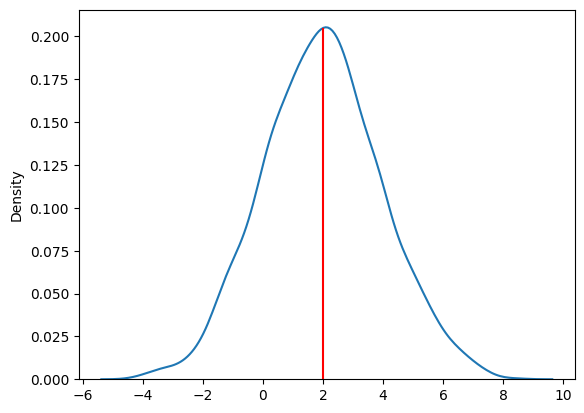

In [37]:
import matplotlib.pyplot as plt
#make this example reproducible
np.random.seed(0)
mean = 2
variance = 4
num_points = 2000
std_deviation = np.sqrt(variance)
# Generate random data points sampled from the Gaussian distribution
data_points = np.random.normal(mean, std_deviation, num_points)
# Create normal distribution curve
# ax = sns.displot(data_points, kind='kde')
ax = sns.kdeplot(data_points) #, kind='kde')

# ax.vlines(x = [-2, 2], ymin = 0, ymax = 0.4,
#           linestyles = ["dashed", "solid"], colors = ["red", "blue"]) 
ax.vlines(x = [2], ymin = 0, ymax = 0.205,
          linestyles = ["solid"], colors = ["red"]) 
# x = ax.lines[0].get_xdata()
# y = ax.lines[0].get_ydata()
# ax.vline(2, color='red')
# ax.lines[0].remove()
plt.show()

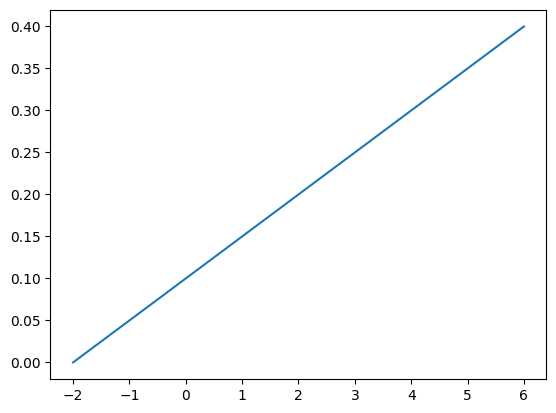

In [32]:
plt.plot([-2, 6], [0, 0.4])

plt.show()

In [30]:
import matplotlib.pyplot as plt
#make this example reproducible
np.random.seed(0)
mean = 2
variance = 1
num_points = 2000
std_deviation = np.sqrt(variance)
# Generate random data points sampled from the Gaussian distribution
data_points = np.random.normal(mean, std_deviation, num_points)
# Create normal distribution curve
# ax = sns.displot(data_points, kind='kde')
# ax = sns.kdeplot(data_points) #, kind='kde')

# ax.vlines(x = [-2, 2], ymin = 0, ymax = 0.4,
#           linestyles = ["dashed", "solid"], colors = ["red", "blue"]) 
ax.vlines(x = [2], ymin = 0, ymax = 0.41,
          linestyles = ["solid"], colors = ["red"]) 
# x = ax.lines[0].get_xdata()
# y = ax.lines[0].get_ydata()
# ax.vline(2, color='red')
# ax.lines[0].remove()
plt.show()

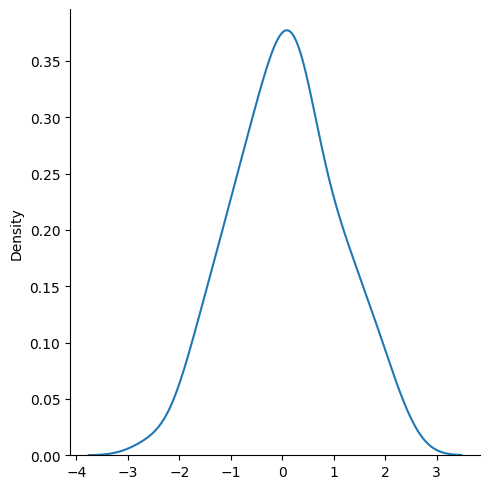

In [3]:
import numpy as np
import seaborn as sns

#make this example reproducible
np.random.seed(0)

#create data
x = np.random.normal(size=100)

#create normal distribution curve
sns.displot(x, kind='kde')

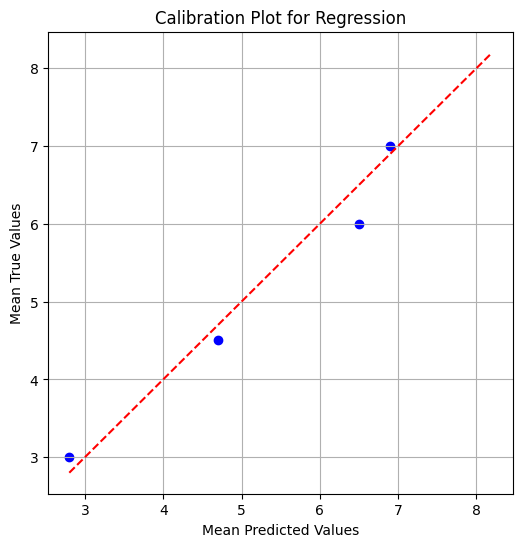

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sample true target values and predicted values (replace with your data)
y_true = np.array([3.0, 4.0, 5.0, 6.0, 7.0, 8.0])
y_pred = np.array([2.8, 4.2, 5.2, 6.5, 6.9, 8.2])

# Define the number of bins
num_bins = 5

# Create bins for predicted values
bins = np.linspace(min(y_pred), max(y_pred), num=num_bins)

# Calculate mean predicted and true values for each bin
mean_predicted = [np.mean(y_pred[(y_pred >= bins[i]) & (y_pred < bins[i + 1])]) for i in range(num_bins - 1)]
mean_true = [np.mean(y_true[(y_pred >= bins[i]) & (y_pred < bins[i + 1])]) for i in range(num_bins - 1)]

# Create a scatterplot for the calibration curve
plt.figure(figsize=(6, 6))
plt.scatter(mean_predicted, mean_true, marker='o', color='blue')
plt.plot([min(y_pred), max(y_pred)], [min(y_pred), max(y_pred)], linestyle='--', color='red')
plt.xlabel('Mean Predicted Values')
plt.ylabel('Mean True Values')
plt.title('Calibration Plot for Regression')
plt.grid(True)
plt.show()


In [94]:
predicted_std

array([0.31622777, 1.41421356, 0.70710678, 1.73205081, 0.4472136 ,
       1.41421356])

In [37]:
import tensorflow as tf

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
# Sample true target values and predicted values (replace with your data)
# y_true = np.array([3.0, 4.0, 5.0, 6.0, 7.0, 8.0])
# y_pred = np.array([2.8, 4.2, 5.2, 6.5, 6.9, 8.2])
y_true = np.array([43, 40, 50, 60, 70, 80,66, 43, 40, 64, 71, 60])
y_pred = np.array([48, 42, 52, 65, 69, 82,60, 43, 44, 66, 75, 50])
# Sample predicted variances (replace with your data)
# predicted_variances = np.array([u0.01, 0.02, 0.03, 0.04, 0.05, 0.06])
# predicted_variances = np.array([0.1, 2, 0.5, 3, 0.2, 2])
predicted_std = np.sqrt(predicted_variances)
# predicted_std = np.array([4, 2, 3.5, 5, 2, 1.5, 5.8, 0.5, 2, 5, 4.5, 7])
# predicted_std = np.array([0.1, 0.2, 0.3, 0.5, 0.2, 0.1])
# predicted_std = np.array([0.1, 0.2, 1.3, 0.5, 1.2, 3.1])
predicted_std = np.array([0.1, 2, 3, 5.1, 2.2, 3.1,5.5, 2.4, 3, 1.3, 2.2, 1.1 ])

# # define the gaussian function
# norm = stats.norm(loc=y_pred, scale=predicted_std)
# y_pred_lower = norm.ppf(0.025)
# y_pred_upper = norm.ppf(0.975)


# alpha = np.arange(start=1, stop=-0.05, step=-0.05)
# confidence_level = 1-alpha
# t_predicted_residual = predicted_std
# t_residual = tf.math.abs(y_pred-y_true)
# t_interval_fit = tf.math.less_equal(t_residual, t_predicted_residual)
# t_confidence_per_interval=tf.math.count_nonzero(t_interval_fit)


n_intervals = 10

p_m = np.linspace(0,1,n_intervals+1)

emp_conf = [0]*(n_intervals+1)

for i in range(n_intervals+1):
    t_residual = np.abs(y_pred-y_true)
    t_predicted_residual = np.abs(predicted_std*stats.norm.ppf((1-p_m[i])/2))
    interval_fit = np.less_equal(t_residual, t_predicted_residual)
    emp_conf[i] = np.mean(interval_fit,axis=0)

In [136]:
p_m

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [137]:
# emp_conf
ece = np.mean(np.abs(emp_conf-p_m))
ece

0.15151515151515155

Text(0.5, 1.0, 'Calibration Plot')

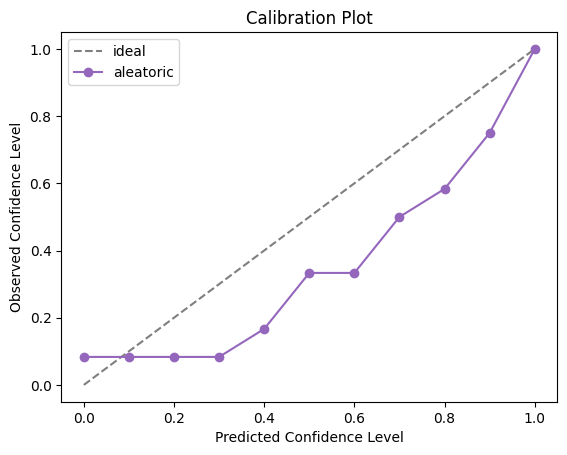

In [138]:
    plt.figure()
    plt.plot([0,1], [0,1], '--', color='tab:gray', label = 'ideal')
    plt.plot(p_m, emp_conf, '-o', color='tab:purple', label='aleatoric')
    plt.xlabel('Predicted Confidence Level')
    plt.ylabel('Observed Confidence Level')
    plt.legend()
    plt.title('Calibration Plot')


In [35]:
confidence_level

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

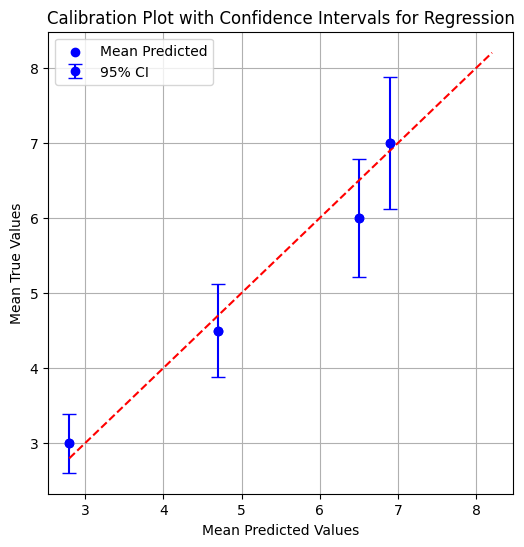

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Sample true target values and predicted values (replace with your data)
y_true = np.array([3.0, 4.0, 5.0, 6.0, 7.0, 8.0])
y_pred = np.array([2.8, 4.2, 5.2, 6.5, 6.9, 8.2])

# Sample predicted variances (replace with your data)
predicted_variances = np.array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06])
predicted_std = np.sqrt(predicted_variances)

# define the gaussian function
norm = stats.norm(loc=y_pred, scale=predicted_std)

y_pred_lower = norm.ppf(0.025)
y_pred_upper = norm.ppf(0.975)

# # Sample confidence intervals for predicted values (replace with your data)
# y_pred_lower = np.array([2.7, 4.1, 5.1, 6.4, 6.8, 8.1])
# y_pred_upper = np.array([2.9, 4.3, 5.3, 6.6, 7.0, 8.3])

# Define the number of bins
num_bins = 5

# Create bins for predicted values
bins = np.linspace(min(y_pred), max(y_pred), num=num_bins)

# Calculate mean predicted and true values for each bin
mean_predicted = [np.mean(y_pred[(y_pred >= bins[i]) & (y_pred < bins[i + 1])]) for i in range(num_bins - 1)]
mean_true = [np.mean(y_true[(y_pred >= bins[i]) & (y_pred < bins[i + 1])]) for i in range(num_bins - 1)]

# Calculate the width of the confidence intervals for each bin
ci_width = [np.mean(y_pred_upper[(y_pred >= bins[i]) & (y_pred < bins[i + 1])]) -
            np.mean(y_pred_lower[(y_pred >= bins[i]) & (y_pred < bins[i + 1])]) for i in range(num_bins - 1)]

# Create a scatterplot for the calibration curve with confidence intervals
plt.figure(figsize=(6, 6))
plt.scatter(mean_predicted, mean_true, marker='o', color='blue', label='Mean Predicted')
plt.errorbar(mean_predicted, mean_true, yerr=ci_width, fmt='o', color='blue', capsize=5, label='95% CI')
plt.plot([min(y_pred), max(y_pred)], [min(y_pred), max(y_pred)], linestyle='--', color='red')
plt.xlabel('Mean Predicted Values')
plt.ylabel('Mean True Values')
plt.title('Calibration Plot with Confidence Intervals for Regression')
plt.legend()
plt.grid(True)
plt.show()


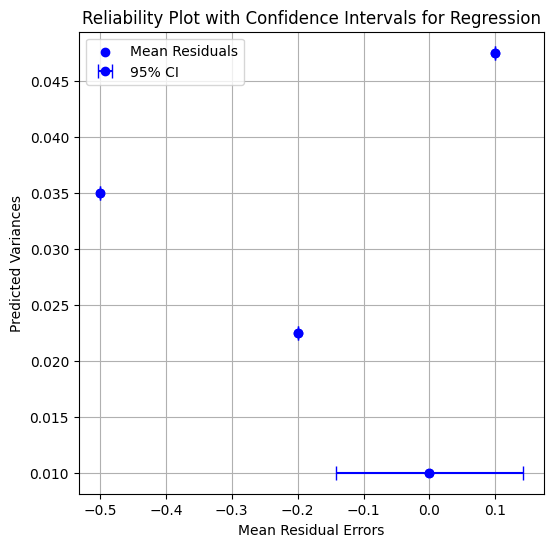

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Sample true target values and predicted values (replace with your data)
y_true = np.array([3.0, 4.0, 5.0, 6.0, 7.0, 8.0])
y_pred = np.array([2.8, 4.2, 5.2, 6.5, 6.9, 8.2])

# Sample predicted variances (replace with your data)
predicted_variances = np.array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06])

# Calculate residual errors
residuals = y_true - y_pred

# Define the number of bins for predicted variances
num_bins = 5

# Create bins for predicted variances
variance_bins = np.linspace(min(predicted_variances), max(predicted_variances), num=num_bins)

# Calculate mean residual errors for each bin of predicted variances
mean_residuals = [np.mean(residuals[(predicted_variances >= variance_bins[i]) & (predicted_variances < variance_bins[i + 1])]) for i in range(num_bins - 1)]

# Calculate the width of the confidence intervals (standard error of the mean) for each bin
ci_width = [np.std(residuals[(predicted_variances >= variance_bins[i]) & (predicted_variances < variance_bins[i + 1])]) /
            np.sqrt(len(residuals[(predicted_variances >= variance_bins[i]) & (predicted_variances < variance_bins[i + 1])])) for i in range(num_bins - 1)]

# Create a scatterplot for the reliability curve with confidence intervals
plt.figure(figsize=(6, 6))
plt.scatter(mean_residuals, variance_bins[:-1], marker='o', color='blue', label='Mean Residuals')
plt.errorbar(mean_residuals, variance_bins[:-1], xerr=ci_width, fmt='o', color='blue', capsize=5, label='95% CI')
plt.xlabel('Mean Residual Errors')
plt.ylabel('Predicted Variances')
plt.title('Reliability Plot with Confidence Intervals for Regression')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
from scipy import stats as stats
from sklearn.isotonic import IsotonicRegression
import tensorflow_probability as tfp
import seaborn as sns

In [3]:
import uncertainty_toolbox as uct

# Load an example dataset of 100 predictions, uncertainties, and ground truth values
predictions, predictions_std, y, x = uct.data.synthetic_sine_heteroscedastic(100)

In [4]:
# Compute all uncertainty metrics
# metrics = uct.metrics.get_all_metrics(predictions, predictions_std, y)
# metrics

In [5]:
mae=np.abs(predictions-y)
mse=np.square(predictions-y)
rmse=np.sqrt(mse)

NameError: name 'np' is not defined

In [6]:
fig, axs = plt.subplots(ncols=5,figsize=(12, 6))
sns.boxplot(y = y,ax=axs[0]).set(title="Ground Truth")
sns.boxplot(y = predictions,ax=axs[1]).set(title="Prediction")
sns.boxplot(y = mae,ax=axs[2]).set(title="Absolute Diff")
sns.boxplot(y = mse,ax=axs[3]).set(title="MSE")
sns.boxplot(y = rmse,ax=axs[4]).set(title="RMSE")

NameError: name 'plt' is not defined

<Axes: title={'center': 'Ordered Prediction Intervals'}, xlabel='Index (Ordered by Observed Value)', ylabel='Predicted Values and Intervals'>

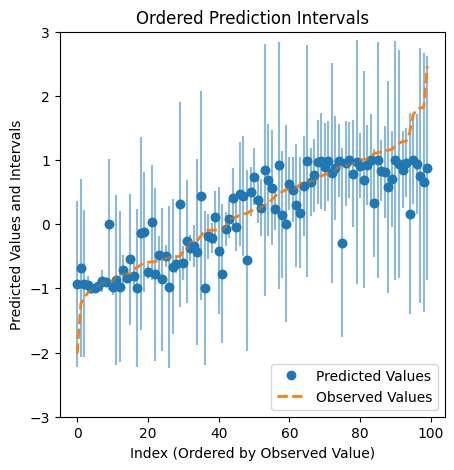

In [7]:
uct.viz.plot_intervals_ordered(predictions, predictions_std, y)


<Axes: title={'center': 'Confidence Band'}, xlabel='$x$', ylabel='$y$'>

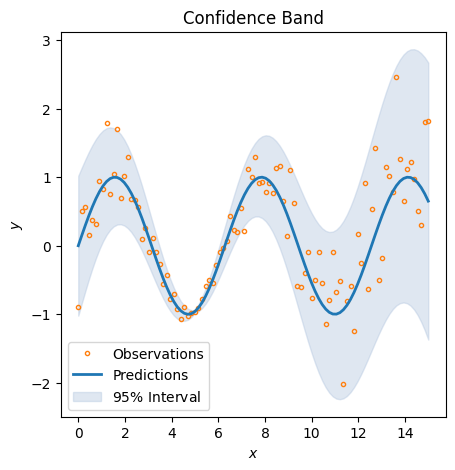

In [8]:
uct.viz.plot_xy(predictions, predictions_std, y, x)

<Axes: title={'center': 'Average Calibration'}, xlabel='Predicted Proportion in Interval', ylabel='Observed Proportion in Interval'>

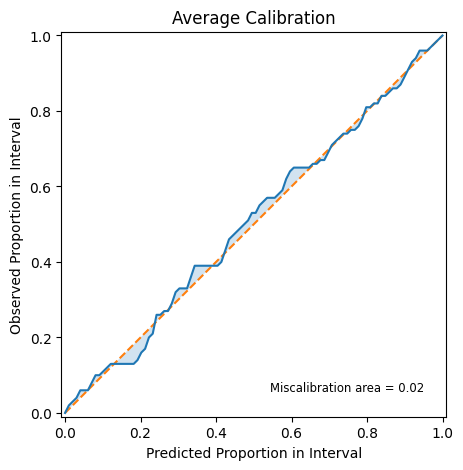

In [9]:
uct.viz.plot_calibration(predictions, predictions_std, y)


<Axes: title={'center': 'Adversarial Group Calibration'}, xlabel='Group size', ylabel='Calibration Error of Worst Group'>

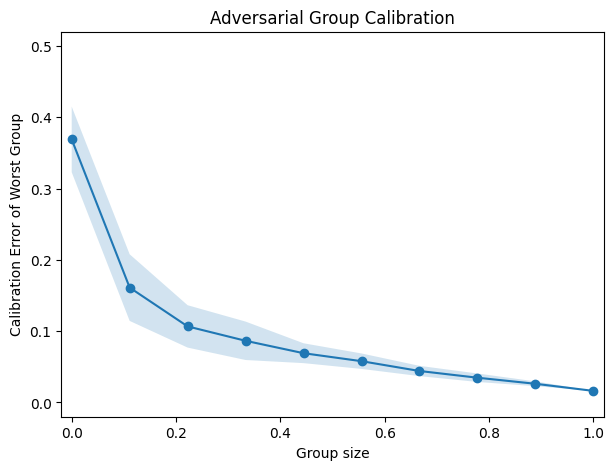

In [10]:
uct.viz.plot_adversarial_group_calibration(predictions, predictions_std, y)

<Axes: title={'center': 'Residuals vs. Predictive Standard Deviations'}, xlabel='Standard Deviations (Scaled)', ylabel='Residuals (Absolute Value)'>

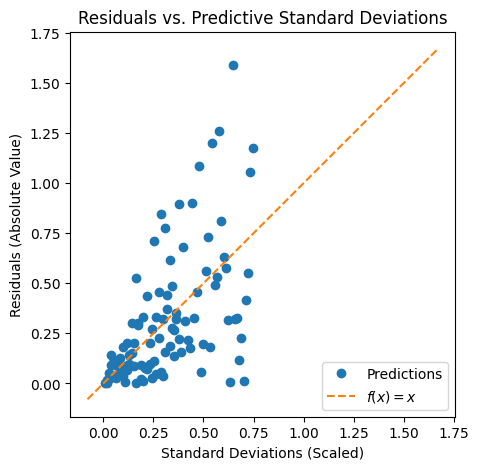

In [11]:
uct.viz.plot_residuals_vs_stds(predictions, predictions_std, y)

In [12]:
predictions,predictions_std

(array([ 0.        ,  0.1509361 ,  0.2984138 ,  0.43905397,  0.56963411,
         0.68716224,  0.78894546,  0.87265161,  0.93636273,  0.978619  ,
         0.99845223,  0.99540796,  0.96955595,  0.92148855,  0.85230712,
         0.76359681,  0.65739025,  0.53612093,  0.40256749,  0.25979004,
         0.11106004, -0.04021468, -0.19056796, -0.33655477, -0.47483011,
        -0.60222569, -0.7158225 , -0.8130177 , -0.89158426, -0.94972199,
        -0.98609877, -0.99988113, -0.99075324, -0.95892427, -0.90512352,
        -0.8305837 , -0.73701276, -0.62655467, -0.50174037, -0.36542971,
        -0.22074597, -0.0710043 ,  0.0803643 ,  0.22989151,  0.37415123,
         0.50983804,  0.63384295,  0.74332464,  0.83577457,  0.90907443,
         0.96154471,  0.99198316,  0.99969234,  0.98449561,  0.94674118,
         0.88729411,  0.8075165 ,  0.70923631,  0.59470541,  0.46654806,
         0.32770071,  0.18134477,  0.03083368, -0.1203839 , -0.26884313,
        -0.41114236, -0.54402111, -0.66443473, -0.7

In [10]:
from scipy import stats as stats
norm = stats.norm(loc=0, scale=1)
# norm = stats.norm(loc=0.150936, scale=0.494848)

In [11]:
norm.ppf(0.25),norm.ppf(0.5),norm.ppf(0.75),norm.ppf(.95),norm.ppf(0.8),norm.ppf(0.8)*5

(-0.6744897501960817,
 0.0,
 0.6744897501960817,
 1.6448536269514722,
 0.8416212335729143,
 4.208106167864571)

In [ ]:
norm.ppf(0.25) --> -0.67448
norm.ppf(0.5) --> 0.0
norm.ppf(0.75) --> 0.67448
norm.ppf(.95) --> 1.644853
norm.ppf(0.99) --> 2.32634

In [12]:
norm = stats.norm(loc=10, scale=5)
norm.ppf(0.25),norm.ppf(0.5),norm.ppf(0.75),norm.ppf(.95),norm.ppf(0.8)

(6.627551249019591,
 10.0,
 13.372448750980409,
 18.22426813475736,
 14.208106167864571)

In [1]:
norm = stats.norm(loc=45, scale=1)
norm.ppf(0.25), norm.ppf(0.5), norm.ppf(0.95)

NameError: name 'stats' is not defined

In [2]:
import pandas as pd
data = pd.DataFrame([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
data

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [46]:
norm = stats.norm(data)

In [47]:
import pandas as pd

In [13]:
data.quantile(0.25), data.quantile(0.50), data.quantile(0.75)

(0    45.0
 Name: 0.25, dtype: float64,
 0    80.0
 Name: 0.5, dtype: float64,
 0    115.0
 Name: 0.75, dtype: float64)

In [ ]:
data.quantile(0.25,interpolation='higher'), data.quantile(0.50,interpolation='higher'), data.quantile(0.75,interpolation='higher')

In [14]:
data.quantile(0.40), data.quantile(0.60)

(0    66.0
 Name: 0.4, dtype: float64,
 0    94.0
 Name: 0.6, dtype: float64)

In [7]:
data.percentile(0.5)

AttributeError: 'DataFrame' object has no attribute 'percentile'

In [38]:
norm.ppf(0.025), norm.ppf(0.975)

(array([  8.04003602,  18.04003602,  28.04003602,  38.04003602,
         48.04003602,  58.04003602,  68.04003602,  78.04003602,
         88.04003602,  98.04003602, 108.04003602, 118.04003602,
        128.04003602, 138.04003602, 148.04003602]),
 array([ 11.95996398,  21.95996398,  31.95996398,  41.95996398,
         51.95996398,  61.95996398,  71.95996398,  81.95996398,
         91.95996398, 101.95996398, 111.95996398, 121.95996398,
        131.95996398, 141.95996398, 151.95996398]))

In [42]:
45 - 0.12541

44.87459

In [38]:
(1.6448536*0.4948)+ 0.150936

0.96480956128

In [ ]:

for i in range(num_intervals-1):

    selected_indx = np.logical_and(scaled_stds.flatten()>p_m[i], scaled_stds.flatten()<=p_m[i+1])
    selected_std=scaled_stds.flatten()[selected_indx]
    selected_rmse=reconst.flatten()[selected_indx]

    uncert_avg[i] = np.mean(selected_std)
    rmse_avg[i] = np.mean(selected_rmse)

In [2]:
pred_prob = np.array([0.7,0.67,0.23,0.19,0.9,0.97,0.54,0.77,0.15,0.3,0.85,0.69,0.34,0.45,0.53])
pred_prob2= np.array([[0.3,0.7],[0.3,0.67],[0.77,0.23],[0.81,0.19],[0.1,0.9],[0.03,0.97],[0.46,0.54],[0.23,0.77],[0.85,0.15],[0.7,0.3],[0.15,0.85],[0.31,0.69],[0.64,0.34],[0.55,0.45],[0.47,0.53]])

pred_class = np.array([1,1,0,0,1,1,1,1,0,0,1,1,0,0,1])
true_class = np.array([1,0,1,0,1,0,0,0,1,0,1,1,0,1,1])

In [4]:
pred_prob_cl = np.array([0.66666667, 0.5, 0.4, 0.4, 0.66666667,0.66666667, 0.5, 0.66666667, 0.4, 0.4 ,
       0.66666667, 0.66666667, 0.4, 0.5, 0.5])
pred_prob_cl

array([0.66666667, 0.5       , 0.4       , 0.4       , 0.66666667,
       0.66666667, 0.5       , 0.66666667, 0.4       , 0.4       ,
       0.66666667, 0.66666667, 0.4       , 0.5       , 0.5       ])

In [5]:
# this takes the multiclass format of taking the max probability
# ece1 = umtf.ExpectedCalibrationError(true_class, pred_prob, num_bins=5)
ece2 = umnp.ece(true_class, pred_prob, num_bins=5)
ece2_cl = umnp.ece(true_class, pred_prob_cl, num_bins=5)

print(ece2,ece2_cl)


0.19733333333333344 1.3333333548359862e-09


In [174]:
#https://towardsdatascience.com/expected-calibration-error-ece-a-step-by-step-visual-explanation-with-python-code-c3e9aa12937d
def expected_calibration_error(samples, true_labels, M=3,binary=True):
    # uniform binning approach with M number of bins
    bin_boundaries = np.linspace(0, 1, M + 1)
    bin_lowers = bin_boundaries[:-1]
    bin_uppers = bin_boundaries[1:]

   # # keep confidences / predicted "probabilities" as they are
   #  confidences = samples

    if binary:
        # keep confidences / predicted "probabilities" as they are
        confidences = samples
        # get binary predictions from confidences
        predicted_label = (samples>0.5).astype(float)
    else:                                          
        # get max probability per sample i                 
        confidences = np.max(samples, axis=1)               
        # get predictions from confidences (positional in this case)
        predicted_label = np.argmax(samples, axis=1).astype(float)

    # get a boolean list of correct/false predictions
    accuracies = predicted_label==true_labels

    ece = np.zeros(1)
    for bin_lower, bin_upper in zip(bin_lowers, bin_uppers):
        # determine if sample is in bin m (between bin lower & upper)
        in_bin = np.logical_and(confidences >= bin_lower.item(), confidences < bin_upper.item())
        # can calculate the empirical probability of a sample falling into bin m: (|Bm|/n)
        prop_in_bin = in_bin.astype(float).mean()

        if prop_in_bin.item() > 0:
            # get the accuracy of bin m: acc(Bm)
            accuracy_in_bin = accuracies[in_bin].astype(float).mean()
            # get the average confidence of bin m: conf(Bm)
            avg_confidence_in_bin = confidences[in_bin].mean()
            # calculate |acc(Bm) - conf(Bm)| * (|Bm|/n) for bin m and add to the total ECE
            ece += np.abs(avg_confidence_in_bin - accuracy_in_bin) * prop_in_bin
    return ece

In [128]:
expected_calibration_error(pred_prob,true_class,5)

array([0.25733333])

In [129]:

expected_calibration_error(pred_prob2,true_class,5,False)

array([0.196])

In [134]:
# ece=tfp.stats.expected_calibration_error(
#     num_bins=5, logits=pred_prob, labels_true=true_class, labels_predicted=pred_class, name=None
# )

### Multiclass

In [185]:
pred_prob_mult = np.array([[0.7,0.2,0.1],[0.1,0.67,0.23],[0.82,0.13,0.05],[0.82,0.03,0.15],
                           [0.05,0.05,0.9],[0.97,0.01,0.02],[0.3,0.54,0.16],[0.2,0.77,0.03],
                           [0.15,0.1,0.75],[0.6,0.1,0.3],[0.05,0.85,0.1],[0.25,0.06,0.69],
                           [0.4,0.34,0.26],[0.42,0.45,0.13],[0.3,0.17,0.53]],np.float32)
true_class = np.array([1,0,1,2,1,0,1,2,2,0,1,2,0,1,0])
pred_class = np.array([0,1,0,0,2,0,1,1,2,0,1,2,0,1,2])

In [186]:
ece2 = umnp.ece(true_class, pred_prob_mult, num_bins=5)
print(ece2)


0.3080000023047129


In [175]:
expected_calibration_error(pred_prob_mult,true_class,5,False)

array([0.308])

In [159]:
    binary=False
    bin_boundaries = np.linspace(0, 1, 5 + 1)
    bin_lowers = bin_boundaries[:-1]
    bin_uppers = bin_boundaries[1:]

   # # keep confidences / predicted "probabilities" as they are
   #  confidences = samples

    if binary:
        # keep confidences / predicted "probabilities" as they are
        confidences = pred_prob_mult
        # get binary predictions from confidences
        predicted_label = (pred_prob_mult>0.5).astype(float)
    else:                                          
        # get max probability per sample i                 
        confidences = np.max(pred_prob_mult, axis=1)               
        # get predictions from confidences (positional in this case)
        predicted_label = np.argmax(pred_prob_mult, axis=1).astype(float)

    # get a boolean list of correct/false predictions
    accuracies = predicted_label==true_class


In [160]:
predicted_label

array([0., 1., 0., 0., 2., 0., 1., 1., 2., 0., 1., 2., 0., 1., 2.])

In [161]:
pred_class

array([0, 1, 0, 0, 2, 0, 1, 1, 2, 0, 1, 2, 0, 1, 2])

In [162]:
confidences

array([0.7 , 0.67, 0.82, 0.82, 0.9 , 0.97, 0.54, 0.77, 0.75, 0.6 , 0.85,
       0.69, 0.4 , 0.45, 0.53], dtype=float32)

In [176]:
    ece = np.zeros(1)
    for bin_lower, bin_upper in zip(bin_lowers, bin_uppers):
        # determine if sample is in bin m (between bin lower & upper)
        in_bin = np.logical_and(confidences >= bin_lower.item(), confidences < bin_upper.item())
        # can calculate the empirical probability of a sample falling into bin m: (|Bm|/n)
        prop_in_bin = in_bin.astype(float).mean()
        print(in_bin,prop_in_bin)

        if prop_in_bin.item() > 0:
            # get the accuracy of bin m: acc(Bm)
            accuracy_in_bin = accuracies[in_bin].astype(float).mean()
            # get the average confidence of bin m: conf(Bm)
            avg_confidence_in_bin = confidences[in_bin].mean()
            # calculate |acc(Bm) - conf(Bm)| * (|Bm|/n) for bin m and add to the total ECE
            print("conf",np.abs(avg_confidence_in_bin - accuracy_in_bin) * prop_in_bin)
            ece += np.abs(avg_confidence_in_bin - accuracy_in_bin) * prop_in_bin

[False False False False False False False False False False False False
 False False False] 0.0
[False False False False False False False False False False False False
 False False False] 0.0
[False False False False False False  True False False False False False
  True  True  True] 0.26666666666666666
conf 0.07199999491373697
[ True  True False False False False False  True  True  True False  True
 False False False] 0.4
conf 0.07866666316986085
[False False  True  True  True  True False False False False  True False
 False False False] 0.3333333333333333
conf 0.1573333462079366


In [164]:
ece

array([0.36133332])

In [165]:
bin_lowers, bin_uppers

(array([0. , 0.2, 0.4, 0.6, 0.8]), array([0.2, 0.4, 0.6, 0.8, 1. ]))

In [170]:
  b = np.linspace(start=0, stop=1.0, num=6)
  bins = np.digitize(confidences, bins=b, right=True)

In [171]:
b

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [172]:
bins

array([4, 4, 5, 5, 5, 5, 3, 4, 4, 4, 5, 4, 3, 3, 3], dtype=int64)

In [173]:
confidences


array([0.7 , 0.67, 0.82, 0.82, 0.9 , 0.97, 0.54, 0.77, 0.75, 0.6 , 0.85,
       0.69, 0.4 , 0.45, 0.53], dtype=float32)

## SCE

In [207]:
pred_prob_mult_1 = np.array([[0.7,0.2,0.1],[0.1,0.67,0.23],[0.82,0.13,0.05],[0.82,0.03,0.15],\
                         [0.05,0.05,0.9],[0.97,0.01,0.02],[0.3,0.54,0.16],[0.2,0.77,0.03],\
                         [0.15,0.1,0.75],[0.6,0.1,0.3],[0.05,0.85,0.1],[0.25,0.06, 0.69],\
                         [0.4,0.34,0.26],[0.42,0.45,0.13],[0.3,0.17,0.53]],np.float64)

pred_prob_mult_2 = np.array([[0.7,0.2,0.1],[0.1,0.67,0.23],[0.82,0.13,0.05],[0.82,0.03,0.15],
                           [0.05,0.05,0.9],[0.97,0.01,0.02],[0.3,0.54,0.16],[0.2,0.77,0.03],
                           [0.15,0.1,0.75],[0.6,0.1,0.3],[0.05,0.85,0.1],[0.25,0.06,0.69],
                           [0.4,0.34,0.26],[0.42,0.45,0.13],[0.3,0.17,0.53]],np.float32)

pred_prob_mult_3 = np.array([[0.7,0.2,0.1],[0.1,0.67,0.23],[0.82,0.13,0.05],[0.82,0.03,0.15],
                           [0.05,0.05,0.9],[0.97,0.01,0.02],[0.3,0.54,0.16],[0.2,0.77,0.03],
                           [0.15,0.1,0.75],[0.6,0.1,0.3],[0.05,0.85,0.1],[0.25,0.06,0.69],
                           [0.4,0.34,0.26],[0.42,0.45,0.13],[0.3,0.17,0.53]])


In [204]:

true_class = np.array([1,0,1,2,1,0,1,2,2,0,1,2,0,1,0])
pred_class = np.array([0,1,0,0,2,0,1,1,2,0,1,2,0,1,2])

In [208]:
ece1 = umnp.ece(true_class, pred_prob_mult_1, num_bins=5)
ece2 = umnp.ece(true_class, pred_prob_mult_2, num_bins=5)
ece3 = umnp.ece(true_class, pred_prob_mult_3, num_bins=5)

print(ece1,ece2,ece3)


0.3613333333333333 0.3080000023047129 0.3613333333333333


In [201]:
expected_calibration_error(pred_prob_mult,true_class,5,False)

array([0.36133333])

In [219]:
umnp.sce(true_class, pred_prob_mult_2, num_bins=5)

0.24977777703768678

In [221]:
umnp.sce(true_class, pred_prob_mult_1, num_bins=5)

0.26755555555555555

In [222]:
umnp.ace(true_class, pred_prob_mult_1, num_bins=5)

0.2773333333333334

In [220]:
umtf.sce(true_class, pred_prob_mult_1, num_bins=5)

AttributeError: module 'uncertainty_metrics.tensorflow' has no attribute 'sce'

In [223]:

def get_adaptive_bins(predictions, num_bins):
  """Returns upper edges for binning an equal number of datapoints per bin."""
  if np.size(predictions) == 0:
    return np.linspace(0, 1, num_bins+1)[:-1]

  edge_indices = np.linspace(0, len(predictions), num_bins, endpoint=False)

  # Round into integers for indexing. If num_bins does not evenly divide
  # len(predictions), this means that bin sizes will alternate between SIZE and
  # SIZE+1.
  edge_indices = np.round(edge_indices).astype(int)

  # If there are many more bins than data points, some indices will be
  # out-of-bounds by one. Set them to be within bounds:
  edge_indices = np.minimum(edge_indices, len(predictions) - 1)

  # Obtain the edge values:
  edges = np.sort(predictions)[edge_indices]

  # Following the convention of numpy.digitize, we do not include the leftmost
  # edge (i.e. return the upper bin edges):
  return edges[1:]

In [283]:
  edge_indices = np.linspace(0, len(predictions), 5, endpoint=False)

  # Round into integers for indexing. If num_bins does not evenly divide
  # len(predictions), this means that bin sizes will alternate between SIZE and
  # SIZE+1.
  edge_indices = np.round(edge_indices).astype(int)

  # If there are many more bins than data points, some indices will be
  # out-of-bounds by one. Set them to be within bounds:
  edge_indices = np.minimum(edge_indices, len(predictions) - 1)

  # Obtain the edge values:
  edges = np.sort(predictions)[edge_indices]

  # Following the convention of numpy.digitize, we do not include the leftmost
  # edge (i.e. return the upper bin edges):
  # return edges[1:]
edges[1:]

array([0.3 , 0.53, 0.69, 0.85])

In [280]:
  edge_indices = np.linspace(0, len(predictions), num_bins, endpoint=False)

  # Round into integers for indexing. If num_bins does not evenly divide
  # len(predictions), this means that bin sizes will alternate between SIZE and
  # SIZE+1.
  edge_indices = np.round(edge_indices).astype(int)

  # If there are many more bins than data points, some indices will be
  # out-of-bounds by one. Set them to be within bounds:
  edge_indices = np.minimum(edge_indices, len(predictions) - 1)
edge_indices

array([ 0,  3,  6,  9, 12])

In [224]:
pred_prob

array([0.7 , 0.67, 0.23, 0.19, 0.9 , 0.97, 0.54, 0.77, 0.15, 0.3 , 0.85,
       0.69, 0.34, 0.45, 0.53])

In [227]:
bin_upper_bounds = get_adaptive_bins(pred_prob2, 5)
bin_upper_bounds


array([[0.19, 0.81],
       [0.46, 0.54],
       [0.3 , 0.7 ],
       [0.34, 0.64]])

In [228]:
bin_upper_bounds = get_adaptive_bins(pred_prob, 5)
bin_upper_bounds

array([0.3 , 0.53, 0.69, 0.85])

In [229]:
predictions=pred_prob
num_bins=5

In [230]:
  if np.size(predictions) == 0:
    print(np.linspace(0, 1, num_bins+1)[:-1])

In [244]:
edge_indices = np.linspace(0, len(predictions), 5, endpoint=False)
edge_indices

array([ 0.,  3.,  6.,  9., 12.])

In [245]:
  # Round into integers for indexing. If num_bins does not evenly divide
  # len(predictions), this means that bin sizes will alternate between SIZE and
  # SIZE+1.
edge_indices = np.round(edge_indices).astype(int)
edge_indices

array([ 0,  3,  6,  9, 12])

In [240]:
15/6

2.5

In [246]:
  # If there are many more bins than data points, some indices will be
  # out-of-bounds by one. Set them to be within bounds:
  edge_indices = np.minimum(edge_indices, len(predictions) - 1)
edge_indices

array([ 0,  3,  6,  9, 12])

In [247]:
  # Obtain the edge values:
  edges = np.sort(predictions)[edge_indices]
edges

array([0.15, 0.3 , 0.53, 0.69, 0.85])

In [248]:
np.sort(predictions)

array([0.15, 0.19, 0.23, 0.3 , 0.34, 0.45, 0.53, 0.54, 0.67, 0.69, 0.7 ,
       0.77, 0.85, 0.9 , 0.97])

In [253]:
edges[1:]

array([0.3 , 0.53, 0.69, 0.85])

In [ ]:
b1=0 to 0.3
b2=0.3 to 0.53
b3=0.53 to 0.69
b4=0.69 to 0.85
b5=0.85 to 1

In [272]:
edges=np.array([0.3 , 0.53, 0.69, 0.85,1])

In [273]:
bin_indices = np.digitize(predictions, edges)
bin_indices

array([3, 2, 0, 0, 4, 4, 2, 3, 0, 1, 4, 3, 1, 1, 2], dtype=int64)

In [257]:
      bin_upper_bounds = np.histogram_bin_edges(
          [], bins=num_bins, range=(0.0, 1.0))[1:]
bin_upper_bounds

array([0.2, 0.4, 0.6, 0.8, 1. ])

In [259]:
predictions

array([0.7 , 0.67, 0.23, 0.19, 0.9 , 0.97, 0.54, 0.77, 0.15, 0.3 , 0.85,
       0.69, 0.34, 0.45, 0.53])

In [258]:
bin_indices = np.digitize(predictions,bin_upper_bounds)
bin_indices

array([3, 3, 1, 0, 4, 4, 2, 3, 0, 1, 4, 3, 1, 2, 2], dtype=int64)

In [291]:
edges = np.append(edges,np.array([1.]))
edges

array([0.15, 0.3 , 0.53, 0.69, 0.85, 1.  ])

In [2]:
def get_bin_upper_bound(predictions,num_bins,binning_scheme="even"):
    if binning_scheme=="even":
        bin_upper_bounds = np.histogram_bin_edges([], bins=num_bins, range=(0.0, 1.0))[1:]
    elif binning_scheme=="adaptive":
        edge_indices = np.linspace(0, len(predictions), num_bins, endpoint=False)
        # Round into integers for indexing. If num_bins does not evenly divide
        # len(predictions), this means that bin sizes will alternate between SIZE and
        # SIZE+1.
        edge_indices = np.round(edge_indices).astype(int)
    
        # If there are many more bins than data points, some indices will be
        # out-of-bounds by one. Set them to be within bounds:
        edge_indices = np.minimum(edge_indices, len(predictions) - 1)
    
        # Obtain the edge values:
        edges = np.sort(predictions)[edge_indices]

        # add the 1. to the upper bound
        edges = np.append(edges,np.array([1.]))

        # Following the convention of numpy.digitize, we do not include the leftmost
        # edge (i.e. return the upper bin edges):
        bin_upper_bounds=edges[1:]
        
            
    return bin_upper_bounds

In [ ]:
bin_upper_bound_ece = 

In [266]:
bb=np.linspace(0, 1, num_bins+1)[1:]
bb

array([0.2, 0.4, 0.6, 0.8, 1. ])

In [267]:
bin_indices = np.digitize(predictions,bb)
bin_indices

array([3, 3, 1, 0, 4, 4, 2, 3, 0, 1, 4, 3, 1, 2, 2], dtype=int64)

In [ ]:
array([3, 3, 1, 0, 4, 4, 2, 3, 0, 1, 4, 3, 1, 2, 2], dtype=int64)


In [294]:
b = np.linspace(start=0, stop=1.0, num=5)
b = np.quantile(predictions, b)
b = np.unique(b)
num_bins = len(b)

In [295]:
num_bins

5

In [296]:
b = np.linspace(start=0, stop=1.0, num=5)
b

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [297]:
b = np.quantile(predictions, b)
b

array([0.15 , 0.32 , 0.54 , 0.735, 0.97 ])

In [299]:
np.sort(predictions)

array([0.15, 0.19, 0.23, 0.3 , 0.34, 0.45, 0.53, 0.54, 0.67, 0.69, 0.7 ,
       0.77, 0.85, 0.9 , 0.97])

In [300]:
b = np.unique(b)
b

array([0.15 , 0.32 , 0.54 , 0.735, 0.97 ])

In [305]:
pred_prob_ace = np.array([0.7,0.67,0.77,0.81,0.9,0.97,0.54,0.77,0.85,0.7,0.85,0.69,0.66,0.55,0.53])
pred_prob_ace

array([0.7 , 0.67, 0.77, 0.81, 0.9 , 0.97, 0.54, 0.77, 0.85, 0.7 , 0.85,
       0.69, 0.66, 0.55, 0.53])

In [306]:
true_class = np.array([1,0,1,0,1,0,0,0,1,0,1,1,0,1,1])

In [328]:
umnp.ace(true_class, pred_prob_mult_2, num_bins=5)

0.3266666656980913

In [329]:
umnp.sce(true_class, pred_prob_mult, num_bins=5)

0.3177777777777778

In [326]:
umnp.ece(true_class, pred_prob_mult_2, num_bins=5)

0.30800000230471297

In [320]:
pred_prob

array([0.7 , 0.67, 0.23, 0.19, 0.9 , 0.97, 0.54, 0.77, 0.15, 0.3 , 0.85,
       0.69, 0.34, 0.45, 0.53])

In [321]:
true_class

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1])

In [330]:
pred_prob_ace = np.array([0.7,0.67,0.77,0.81,0.9,0.97,0.54,0.77,0.85,0.7,0.85,0.69,0.66,0.55,0.53])
np.sort(pred_prob_ece)

array([0.53, 0.54, 0.55, 0.66, 0.67, 0.69, 0.7 , 0.7 , 0.77, 0.77, 0.81,
       0.85, 0.85, 0.9 , 0.97])

In [332]:
bin_upper_bounds=get_bin_upper_bound(pred_prob_ace,num_bins,binning_scheme="adaptive")
bin_upper_bounds

array([0.66, 0.7 , 0.77, 0.85, 1.  ])

In [334]:
b = np.linspace(start=0, stop=1.0, num=5)
b = np.quantile(pred_prob_ace, b)
b

array([0.53 , 0.665, 0.7  , 0.83 , 0.97 ])

In [5]:
pred_prob_cl = np.array([0.5 , 0.4 , 0.5 , 0.5 , 0.75, 0.75, 0.4 , 0.5 , 0.75, 0.5 , 0.75,
       0.5, 0.4, 0.4, 0.4 ])
bin_upper_bounds=get_bin_upper_bound(pred_prob_cl,5,binning_scheme="adaptive")
bin_upper_bounds

array([0.4 , 0.5 , 0.5 , 0.75, 1.  ])

In [6]:
np.sort(pred_prob_cl)

array([0.4 , 0.4 , 0.4 , 0.4 , 0.4 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ,
       0.75, 0.75, 0.75, 0.75])